# Milestones 2 (Phase 2)

# I. Perkenalan

- Nama  : Ida Ayu Gede Ima Dewi Pertami
- Batch : HCK-004

Problems Statement :
- Spam SMS telah menjadi masalah besar dalam beberapa waktu terakhir. Hal ini dapat menyebabkan berbagai masalah seperti kehilangan informasi penting, pelanggaran privasi, dan juga kerugian finansial. Mendeteksi dan menyaring pesan spam ini adalah tugas penting bagi operator jaringan seluler dan platform pesan.


Objective :
- Untuk mengembangkan model pembelajaran mesin yang dapat mengklasifikasikan pesan SMS dengan akurat sebagai spam atau bukan spam


Latar belakang :
- Meningkatnya penggunaan telepon seluler telah menyebabkan peningkatan pesan spam, yang tidak hanya menjengkelkan tetapi juga merupakan ancaman potensial terhadap keamanan dan privasi pengguna. Operator jaringan seluler dan platform pesan perlu melindungi pelanggannya dari pesan seperti itu. Dataset koleksi spam SMS memberikan kesempatan besar untuk mengembangkan model pembelajaran mesin yang dapat mengklasifikasikan pesan SMS dengan akurat sebagai spam atau bukan spam. Tujuan dari proyek ini adalah membangun model klasifikasi spam SMS yang kuat yang dapat dengan akurat mendeteksi dan menyaring pesan spam secara real-time.

# II. Import Libraries

- Bagian ini hanya berisi library yang digunakan dalam project

In [1]:
# Package installer for python
!pip install feature_engine
!pip install tensorflow
!pip install pysastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 6.1 MB/s eta 0:00:00


In [69]:
# Library untuk memanggil dataset
import pandas as pd
import numpy as np

# Libraries untuk exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing data library
import nltk
import string
import re
import ast
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Model
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout
from tensorflow.keras.models import Model, Sequential, load_model

# Evaluasi
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,ConfusionMatrixDisplay,confusion_matrix

# Save model
import joblib

import warnings
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# III. Data Loading

- Bagian ini berisi proses persiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Loading Data dapat berupa pemberian nama baru untuk setiap kolom, pengecekan ukuran dataset, dll.

In [3]:
# Mengunggah file data
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [4]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--", "none", "?", "-",' ?', 'NaN', 'nan']
df = pd.read_csv('spam.csv', na_values=missing_values , encoding='ISO-8859-1')

- Missing value pada dataset diganti menjadi nan value
- Dalam contoh kode yang diberikan, encoding='ISO-8859-1' digunakan untuk memberitahu Python bahwa file CSV yang dibaca menggunakan encoding ISO-8859-1. Tanpa spesifikasi encoding ini, Python akan menggunakan encoding default yang mungkin tidak cocok dengan file CSV tersebut.
- Pilihan encoding yang tepat sangat penting untuk membaca file CSV dengan benar, karena jika encoding tidak sesuai, karakter-karakter khusus atau tanda baca dalam teks dapat diartikan dengan salah dan memengaruhi analisis yang dilakukan.

In [5]:
# Melihat jumlah baris dan kolom pada dataset
df.shape

(5572, 5)

- Dari output diatas, dapat diinterpretasikan bahwa DataFrame memiliki 5.572 baris dan 5 kolom. Artinya, DataFrame terdiri dari 5.572 data (entri) yang masing-masing memiliki 5 fitur (kolom) yang berbeda. Informasi ini penting untuk membantu pemahaman tentang ukuran data yang digunakan dalam suatu analisis atau model pembelajaran mesin, serta dalam melakukan operasi data manipulasi, pemrosesan, dan visualisasi data yang sesuai.

In [6]:
# Menampilkan 5 baris dataset teratas
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# Menampilkan 5 baris dataset terakhir
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
# Memeriksa informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# Mencari dataset yang duplikasi
df[df.duplicated()].shape

(403, 5)

- Berdasarkan hasil di atas menunjukkan jumlah baris dan kolom dari dataset dalam DataFrame yang memiliki duplikat atau data yang sama persis.
- Hasil output menunjukkan bahwa terdapat 403 baris dan 5 kolom dalam dataset yang ditemukan sebagai duplikat.
- Informasi ini dapat membantu dalam melakukan pembersihan data dengan menghapus atau menggabungkan data duplikat yang tidak diperlukan.

In [10]:
# Menampilkan letak dataset yang terduplikasi
df[df.duplicated()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
102,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
153,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN
222,ham,"Sorry, I'll call later",NaN,NaN,NaN
325,ham,No calls..messages..missed calls,NaN,NaN,NaN
...,...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
5535,ham,"I know you are thinkin malaria. But relax, chi...",NaN,NaN,NaN
5539,ham,Just sleeping..and surfing,NaN,NaN,NaN
5553,ham,Hahaha..use your brain dear,NaN,NaN,NaN


In [11]:
# Menghapus dataset yang terduplikasi
df.drop_duplicates(inplace=True)

In [12]:
# Menampilkan kembali dataset yang terduplikasi
df[df.duplicated()].shape

(0, 5)

- Tidak terdapat adanya dataset yang terdupliksi lagi setelah data duplikasi dihandling dengan cara di drop/dihapus
- Data duplikat pada umumnya perlu dihapus atau di-drop dari dataset karena hal ini dapat mempengaruhi kinerja model dalam belajar dan menghasilkan output yang tidak akurat.

In [13]:
# Mencari missing value pada setiap kolom dalam dataset
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

- Berdasarkan hasil di atas, dapat dilihat bahwa kolom 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' memiliki  missing value. Jumlah missing value pada setiap kolom tersebut adalah 5126, 5159, 5164
- Hal ini menunjukkan bahwa data pada kolom tersebut perlu diproses lebih lanjut untuk mengisi missing value atau menghapus baris yang memiliki missing value agar tidak mengganggu kualitas model yang akan dibangun.

In [14]:
# Melihat persentase missing value pada masing-masing kolom dan menghitung total persentase missing values pada dataset
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

total_missing = df.isna().sum().sum()
percentage_missing = (total_missing / (df.shape[0] * df.shape[1])) * 100
print(f"Persentase keseluruhan missing values di DataFrame adalah: {percentage_missing:.2f}%")

v1             0.000000
v2             0.000000
Unnamed: 2    99.168118
Unnamed: 3    99.806539
Unnamed: 4    99.903269
dtype: float64
Persentase keseluruhan missing values di DataFrame adalah: 59.78%


- Persentase missing values dari kolom Unnamed: 2 , Unnamed: 3  dan Unnamed: 4  secara berturut-turut nilai missing valuesnya yaitu 99.168118, 99.806539 , dan 99.903269, hampir keseluruhan informasi yang ada pada kolom tersebut merupakan missing values maka akan dihandling dengan cara di hapus/drop missing values untuk kolom tersebut.
- Missing value diatas menurut saya merupakan missing values MCAR (Missing Completely At Random) adalah jenis missing value dimana nilai yang hilang sepenuhnya acak, dan tidak terkait dengan nilai dari variabel lain dalam dataset. Artinya, kemungkinan terjadinya missing value di suatu observasi tidak dipengaruhi oleh nilai dari variabel manapun dalam dataset, dan tidak ada pola atau alasan tertentu yang menjelaskan terjadinya missing value.



In [15]:
# Menghapus baris pada kolom 'Unnamed: 2','Unnamed: 3','Unnamed: 4' yang terdapat missing value
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [16]:
# Melihat missing values pada masing-masing kolom
print(df.isnull().sum())

v1    0
v2    0
dtype: int64


- Setelah missing values di handling dengan cara di trimming  maka tidak ada lagi missing values pada dataset

# IV. Exploratory Data Analysis (EDA)

- Bagian ini berisi eksplorasi data pada dataset di atas dengan menggunakan query, pengelompokan, visualisasi sederhana, dan sebagainya.
- Dikutip dari medium.com, Exploratory Data Analysis (EDA) merupakan bagian dari proses data science. EDA sangat penting sebelum melakukan feature engineering dan modeling karena pada tahap ini kita harus memahami data terlebih dahulu.
Untuk EDA, saya sajikan beberapa visualisasi histogram dan visualisasi untuk informasi data kategorik berupa diagram batang dan diagram lingkaran.

In [17]:
# Mengubah nama kolom
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [18]:
# Menampilkan deskriptif dari kolom-kolom pada DataFrame yang memiliki tipe data numerik
df.describe().T

,count,unique,top,freq
label,5169,2,ham,4516
message,5169,5169,"Go until jurong point, crazy.. Available only ...",1


Hasil di atas dapat dijelaskan sebagai berikut:

- Kolom "label" memiliki 2 nilai unik ("ham" dan "spam").
"ham" muncul sebanyak 4516 kali pada kolom "label", yang menunjukkan bahwa mayoritas pesan dalam dataset adalah pesan normal ("ham").
- Kolom "message" juga memiliki 5169 nilai unik yang berbeda, yang menunjukkan bahwa setiap pesan dalam dataset unik dan tidak ada duplikasi.

In [19]:
# Melihat deskripsi kolom pada DataFrame yang telah dikelompokkan berdasarkan nilai pada kolom 'label
df.groupby('label').describe().T

label                                                         ham  \
message count                                                4516   
        unique                                               4516   
        top     Go until jurong point, crazy.. Available only ...   
        freq                                                    1   

label                                                        spam  
message count                                                 653  
        unique                                                653  
        top     Free entry in 2 a wkly comp to win FA Cup fina...  
        freq                                                    1

In [20]:
# Menghitung jumlah pelanggan berdasarkan label
df.label.value_counts().sort_values(ascending = False)

ham     4516
spam     653
Name: label, dtype: int64

Text(0.5, 1.0, 'Number of ham and spam messages')

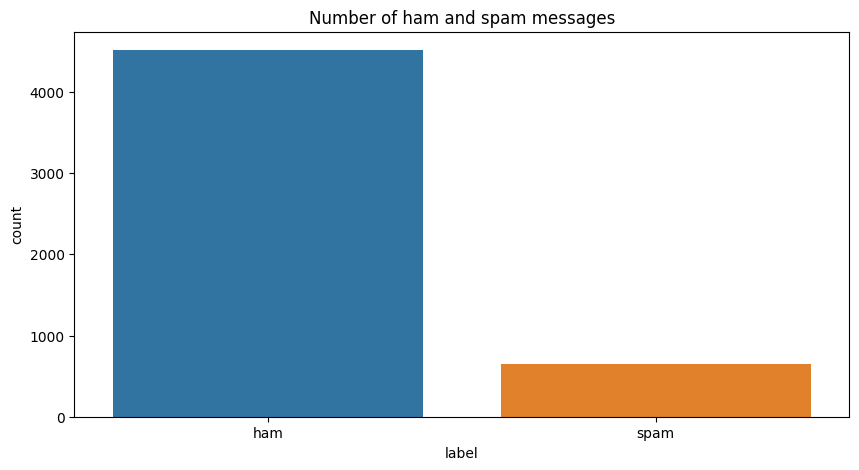

In [21]:
# Membuat plot untuk kolom label
plt.figure(figsize=(10,5))
sns.countplot(x = 'label', data = df)
plt.title('Number of ham and spam messages')

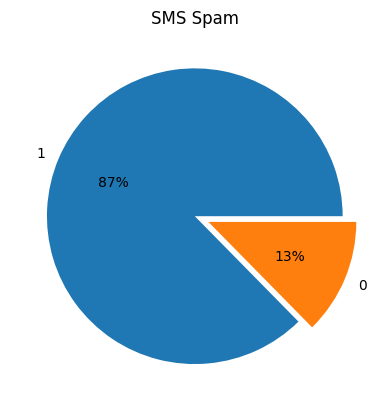

In [22]:
plt.pie(df['label'].value_counts(),labels = [1,0], autopct='%.0f%%', explode=[0,0.1])
plt.title('SMS Spam')
plt.show()

Dari hasil tersebut, dapat dijelaskan sebagai berikut:
- Terdapat 4516 pesan yang memiliki nilai "ham" pada kolom "label", dan 653 pesan yang memiliki nilai "spam" pada kolom "label".
- Pesan dengan nilai "ham" memiliki kemunculan terbanyak dengan jumlah 4516.
- Pesan dengan nilai "spam" memiliki kemunculan lebih sedikit dibanding pesan dengan nilai "ham", dengan jumlah 653.
- Hasil ini memberikan gambaran umum tentang distribusi nilai pada kolom "label" dalam dataset, yaitu bahwa mayoritas pesan dalam dataset memiliki nilai "ham". Hal ini menunjukkan bahwa dataset yang digunakan mungkin tidak seimbang (imbalanced), di mana jumlah pesan dengan nilai "ham" jauh lebih banyak dibanding jumlah pesan dengan nilai "spam".

# V. Feature Engineering/Data Preprocessing

- Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## -Preprocessing Single Document-

Langkah-langkah Preprocessing :

- Mengubah teks ke lowercase
- Menghilangkan tanda baca
- Menghilangkan karakter yang tidak diperlukan
- Menghilangkan stopwords
- Stemming

In [23]:
# Membuat variabel baru dari DataFrame
nba = df.copy()

In [24]:
# Mengganti nilai ham menjadi 0 dan spam menjadi 1
nba['label'] = nba['label'].replace({'ham': 0, 'spam': 1})

In [25]:
# Mengambil 1 teks message
sample = nba['message'].iloc[1]
sample

'Ok lar... Joking wif u oni...'

In [26]:
# Open chatwords.txt
with open('chatwords.txt') as j:
    data = j.read()

chatwords = ast.literal_eval(data)
chatwords

{'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ATK': 'At The Keyboard',
 'ATM': 'At The Moment',
 'A3': 'Anytime, Anywhere, Anyplace',
 'AFT': 'After',
 'ARD': 'Around',
 'B': 'Be',
 'BAK': 'Back At Keyboard',
 'BBL': 'Be Back Later',
 'BBS': 'Be Back Soon',
 'BFN': 'Bye For Now',
 'B4N': 'Bye For Now',
 'BRB': 'Be Right Back',
 'BRT': 'Be Right There',
 'BTW': 'By The Way',
 'B4': 'Before',
 'C': 'See',
 'CINE': 'Cinema',
 'CU': 'See You',
 'CUL8R': 'See You Later',
 'CYA': 'See You',
 'COMIN': 'Coming',
 'DUN': 'Dont',
 'DAT': 'That',
 'E': 'The',
 'FR': 'From',
 'FAQ': 'Frequently Asked Questions',
 'FC': 'Fingers Crossed',
 'FWIW': 'For What Its Worth',
 'FYI': 'For Your Information',
 'GAL': 'Get A Life',
 'GG': 'Good Game',
 'GN': 'Good Night',
 'GMTA': 'Great Minds Think Alike',
 'GR8': 'Great',
 'G9': 'Genius',
 'HAV': 'Have',
 'IC': 'I See',
 'ICQ': 'I Seek you (also a chat program)',
 'ILU': 'I Love You',
 'IMHO': 'In My Honest/H

- Variabel chatwords berisi kamus yang dapat digunakan untuk membantu mengubah dataset (message) slang menjadi kata yang benar
(sumber : https://www.kaggle.com/code/niteshk97/nlp-text-preprocessing#Step-5--Chat-word)

In [27]:
# Melakukan penggantian kata-kata dalam sebuah string yang sesuai dengan kamus 'chatwords'
temp=[]
for chat in sample.split():
   if chat.upper() in chatwords:
      temp.append(chatwords[chat.upper()])
   else:
      temp.append(chat)

sample = " ".join(temp)
sample

'Ok lar... Joking With You oni...'

In [28]:
# Mengganti semua huruf menjadi huruf kecil
sample = sample.lower()
sample

'ok lar... joking with you oni...'

In [29]:
# Open abbreviation.txt
with open('abbreviation.txt') as abb:
    ab = abb.read()

abbreviation =  ast.literal_eval(ab)
abbreviation

{"what's": 'what is',
 "what're": 'what are',
 "who's": 'who is',
 "who're": 'who are',
 "where's": 'where is',
 "where're": 'where are',
 "when's": 'when is',
 "when're": 'when are',
 "how's": 'how is',
 "how're": 'how are',
 "i'm": 'i am',
 "we're": 'we are',
 "you're": 'you are',
 "they're": 'they are',
 "it's": 'it is',
 "he's": 'he is',
 "she's": 'she is',
 "that's": 'that is',
 "there's": 'there is',
 "there're": 'there are',
 "i've": 'i have',
 "we've": 'we have',
 "you've": 'you have',
 "they've": 'they have',
 "who've": 'who have',
 "would've": 'would have',
 "not've": 'not have',
 "i'll": 'i will',
 "we'll": 'we will',
 "you'll": 'you will',
 "he'll": 'he will',
 "she'll": 'she will',
 "it'll": 'it will',
 "they'll": 'they will',
 "isn't": 'is not',
 "wasn't": 'was not',
 "aren't": 'are not',
 "weren't": 'were not',
 "can't": 'can not',
 "couldn't": 'could not',
 "don't": 'do not',
 "didn't": 'did not',
 "shouldn't": 'should not',
 "wouldn't": 'would not',
 "doesn't": 'does n

- File teks yang berisi kamus abbreviation dan mengubahnya menjadi objek dictionary yang akan digunakan untuk menyesuaikan kata di dalam message
(sumber : https://www.kaggle.com/code/life2short/data-processing-replace-abbreviation-of-word/notebook)

In [30]:
# Melakukan penggantian kata-kata dalam sebuah string yang sesuai dengan kamus 'abbreviation'
temp2=[]
for ab2 in sample.split():
   if ab2 in abbreviation:
      temp2.append(abbreviation[ab2])
   else:
      temp2.append(ab2)

sample = " ".join(temp2)
sample

'ok lar... joking with you oni...'

In [31]:
# Menghilangkan seluruh tanda baca
sample = re.sub("[^a-zA-Z]",' ', sample)
sample = re.sub('\[[^]]*\]', ' ', sample)
sample

'ok lar    joking with you oni   '

In [32]:
# Menghilangkan baris baru
sample = re.sub(r"\\n", " ", sample)
# Menghilangkan whitespace
sample = sample.strip()

# Teks yang sudah bersih dari tanda baca
sample = ' '.join(sample.split())
sample

'ok lar joking with you oni'

In [33]:
# Stopwords
stop_words = stopwords.words('english')

- Stopwords digunakan untuk menghilangkan kata-kata yang umum agar tidak mempengaruhi hasil analisis atau klasifikasi yang dilakukan pada teks.
- Kata-kata stopwords seperti "the", "a", "an", "and", "in", "of", dan lain-lain biasanya dihilangkan dari dokumen atau teks agar tidak mempengaruhi akurasi klasifikasi.

In [34]:
# Menghilangkan stopwords
tokens = word_tokenize(sample)
stop_words2 = ' '.join([word for word in tokens if word not in stop_words])

print('Document       (Size :', len(sample.split()),') : ', sample,'\n')
print('Tokens         (Size :', len(tokens),') : ', tokens,'\n')
print('Cleaned Tokens (Size :', len(stop_words2.split()),') : ', stop_words2)

Document       (Size : 6 ) :  ok lar joking with you oni 

Tokens         (Size : 6 ) :  ['ok', 'lar', 'joking', 'with', 'you', 'oni'] 

Cleaned Tokens (Size : 4 ) :  ok lar joking oni


Menampilkan output yang terdiri dari tiga baris teks, yaitu:
- Baris pertama menampilkan string sample asli (6 kata)
- Baris kedua menampilkan token-token dari string sample (6 kata)
- Baris ketiga menampilkan token-token dari string sample setelah proses penghapusan stop words (4 kata, with dan you dihilangkan)

In [35]:
# Normalisasi stemming
ps = PorterStemmer()
example_ps = [ps.stem(word) for word in stop_words2.split()]
# Normalisasi lemmatization
lem = WordNetLemmatizer()
example_lem = [lem.lemmatize(word) for word in stop_words2.split()]

stem = pd.DataFrame({'Original':stop_words2.split(),'Stemming':example_ps,'Lemmatization':example_lem})
stem.head(7)

,Original,Stemming,Lemmatization
0,ok,ok,ok
1,lar,lar,lar
2,joking,joke,joking
3,oni,oni,oni


- Hasil di atas menunjukkan perbandingan antara original kata dengan kata yang telah melalui proses stemming dan lemmatization.
- Kata "joking" mengalami perubahan menjadi "joke" dalam proses stemming dan tetap sama "joking" dalam proses lemmatization, karena kata "joke" merupakan bentuk dasar dari kata "joking".

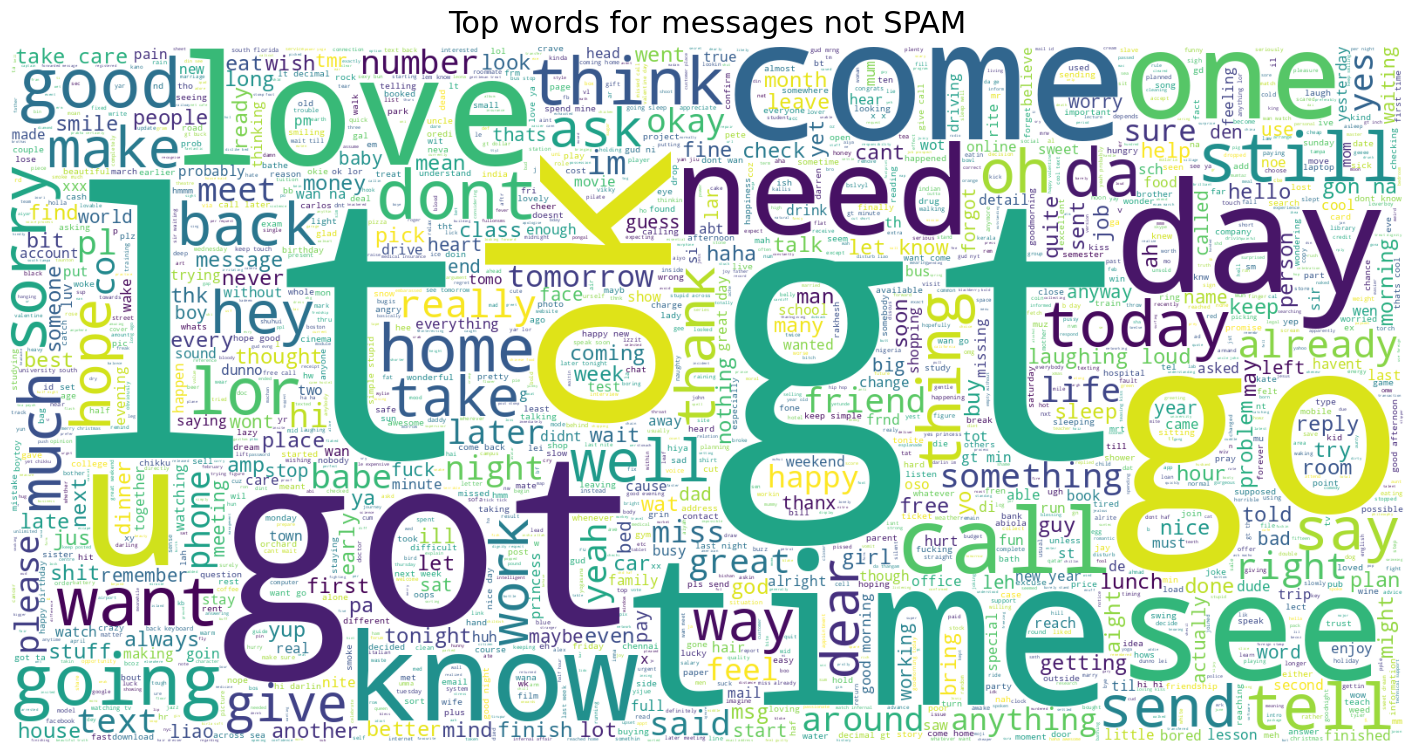

In [78]:
wc = WordCloud(
    background_color='white',
    max_words=2000, width = 1600, height = 800, stopwords = STOPWORDS)
wc.generate(" ".join(nba[nba['label']== 0]['message']))
plt.figure(figsize=(18,10))
plt.title('Top words for messages not SPAM',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

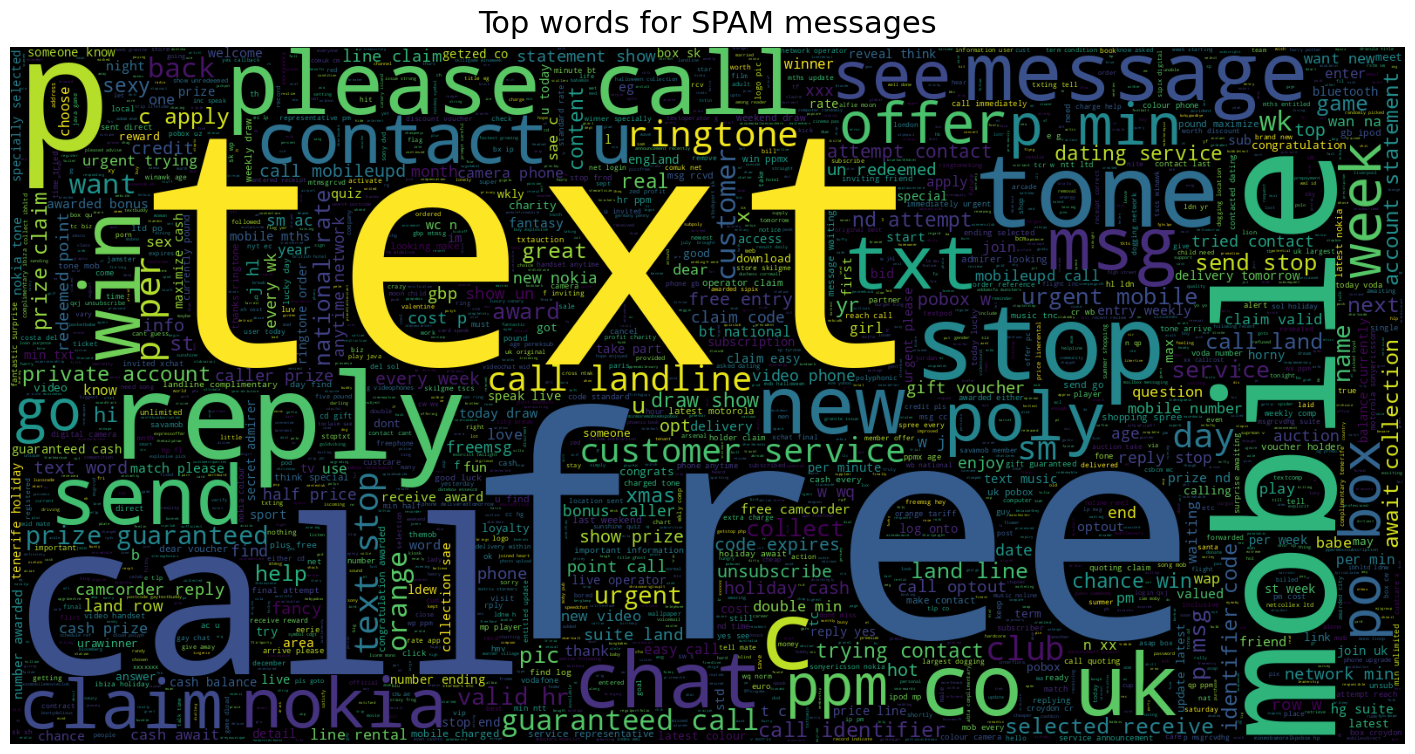

In [81]:
wc = WordCloud(
    background_color='black',
    max_words=2000, width = 1600, height = 800, stopwords = STOPWORDS)
wc.generate(" ".join(nba[nba['label']== 1]['message']))
plt.figure(figsize=(18,10))
plt.title('Top words for SPAM messages',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()


## -Preprocessing Whole Document-

In [36]:
# Membuat fungsi digunakan untuk membersihkan teks yang tidak terstruktur untuk proses analisis teks lebih lanjut
def check_chatwords(text):
    temp=[]
    for chat in text.split():
        if chat.upper() in chatwords:
            temp.append(chatwords[chat.upper()])
        else:
            temp.append(chat)
    return " ".join(temp)

def lower(text):
    data = text.lower()
    return data

def check_abbr(text):
    temp2=[]
    for abbr in text.split():
      if abbr in abbreviation:
          temp2.append(abbreviation[abbr])
      else:
          temp2.append(abbr)

    return " ".join(temp2)

def check_punctuation(text):
    data = re.sub("[^a-zA-Z]",' ', text)
    data = re.sub('\[[^]]*\]', ' ', data)
    data = re.sub(r"\\n", " ", data)
    data = data.strip()
    data = ' '.join(data.split())
    return data

def token_stopwords_lemma(text):
    tokens = word_tokenize(text)
    stop_words2 = ' '.join([word for word in tokens if word not in stop_words])
    data = [lem.lemmatize(word) for word in stop_words2.split()]
    data = ' '.join(data)
    return data

- check_chatwords: Mengecek apakah kata dalam teks terdapat dalam kamus chatwords. Jika kata tersebut ada dalam kamus, maka kata akan diganti dengan kata pengganti dalam kamus, jika tidak, maka kata akan tetap sama.
- lower: Mengubah seluruh huruf dalam teks menjadi huruf kecil.
- check_abbr: Mengecek apakah kata dalam teks merupakan singkatan yang terdapat dalam kamus abbreviation. Jika kata tersebut adalah singkatan yang ada dalam kamus, maka kata akan diganti dengan kata yang sesuai dalam kamus, jika tidak, maka kata akan tetap sama.
- check_punctuation: Menghapus seluruh tanda baca dalam teks.
- token_stopwords_lemma: Memproses teks menjadi token, menghapus kata-kata yang terdapat dalam daftar stopwords, dan mengubah kata-kata dalam teks menjadi bentuk dasarnya menggunakan proses lemmatization.

In [37]:
# Membersihkan dan memproses kolom 'message' pada sebuah dataframe
nba['message'] = nba['message'].apply(lambda j: check_chatwords(j))
nba['message'] = nba['message'].apply(lambda k: lower(k))
nba['message'] = nba['message'].apply(lambda v: check_abbr(v))
nba['message'] = nba['message'].apply(lambda r: check_punctuation(r))
nba['message'] = nba['message'].apply(lambda m: token_stopwords_lemma(m))

- Setelah diproses melalui semua fungsi tersebut, kolom 'message' pada dataframe akan berisi teks yang sudah dibersihkan dan dipersiapkan untuk proses analisis teks lebih lanjut.

In [38]:
# Memperlihatkan 5 data yang sudah dibersihkan
nba['message'].sample(6)

4143                         shame maybe cld meet hr tomo
4164    dear voucher holder claim week offer pc please...
4307                      ha ha popped loo hello ed hello
495                                               got meh
2450                                   k give back thanks
1028               laughing loud forgot eh yes bring babe
Name: message, dtype: object

In [39]:
# Memperlihatkan 1 data full yang sudah dibersihkan
nba['message'].iloc[0]

'go jurong point crazy available bugis great world la buffet cinema got amore wat'

## -Imbalance Handling-

In [40]:
# Total data pada kategori 1 adalah 653
df_1 = nba[nba['label']==1]

In [41]:
# Maka total sample yang diambil pada kategori 0 adalah 653 juga
df_0 = nba[nba['label']==0].sample(653,random_state=42)

In [42]:
# Menggabungkan kembali data yang sudah dilakukan imbalance handling
nba2 = pd.concat([df_0,df_1],axis=0)
nba2.shape

(1306, 2)

- Dataframe nba2 terdiri dari dua kelompok data, yaitu data dengan label 0 dan data dengan label 1.
- Kelompok data dengan label 1 tidak diubah, sedangkan kelompok data dengan label 0 diambil sejumlah 653 baris secara acak.
- Tujuan dari pembuatan dataframe nba2 adalah untuk membuat dataset yang seimbang (balanced) antara kelompok data dengan label 0 dan label 1.
- Dalam hal ini, jumlah data pada kedua kelompok sama besar, yaitu 653 baris. Sehingga jumlah total baris dalam dataframe nba2 adalah 1306.
- Dataset yang seimbang sangat penting dalam proses klasifikasi karena jika kelompok data dengan label yang dominan terlalu banyak, maka kemungkinan model yang dibuat akan cenderung memprediksi label yang sama dengan label yang dominan tersebut.

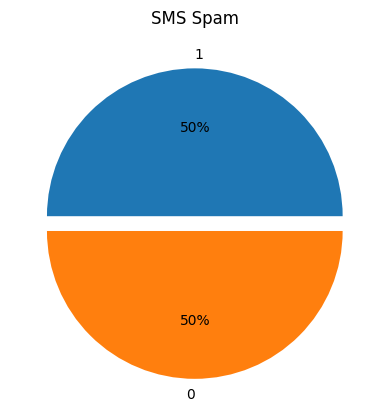

In [43]:
plt.pie(nba2['label'].value_counts(),labels = [1,0], autopct='%.0f%%', explode=[0,0.1])
plt.title('SMS Spam')
plt.show()

In [44]:
nba2.label.value_counts().sort_values(ascending = False)

0    653
1    653
Name: label, dtype: int64

## -Data Splitting-

In [45]:
# # melakukan split pada data train dan data test
# X_train_val, X_test, y_train_val, y_test = train_test_split(nba2['message'], nba2['label'], test_size = 0.2, random_state = 42, stratify=nba2['label'])
# # melakukan split pada data train dan data validasi
# X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.2, random_state = 42, stratify=y_train_val)

In [46]:
# Split Train, Test, Validasi
X_train, X_test, y_train, y_test = train_test_split(nba2.message,
                                                    nba2.label,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=nba2.label)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Val Size  : ', X_val.shape)

Train Size :  (835,)
Test Size  :  (262,)
Val Size  :  (209,)


## -CountVectorizer-

In [47]:
# Get Vocabularies
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)
X_val_vec = Vectorize.transform(X_val)

X_train_vec

<835x2508 sparse matrix of type '<class 'numpy.int64'>'
	with 8584 stored elements in Compressed Sparse Row format>

-  CountVectorizer menghasilkan sebuah matriks sparse dengan dimensi 835 baris dan 2508 kolom, dengan 8584 elemen yang disimpan
- Matriks sparse tersebut merepresentasikan jumlah kemunculan setiap kata dalam dokumen yang telah diproses sebelumnya. Setiap baris mewakili satu dokumen, dan setiap kolom merepresentasikan satu kata. Angka pada matriks menunjukkan jumlah kemunculan kata tersebut pada dokumen tertentu.

In [48]:
# Mencari Jumlah Vocab dan Panjang Token dalam Satu Document
jml_vocab = len(Vectorize.vocabulary_.keys())
max_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab : ", jml_vocab)
print("Panjang maksimum kalimat : ", max_len, "kata")

Jumlah vocab :  2508
Panjang maksimum kalimat :  45 kata


Dari hasil di atas, dapat dijelaskan bahwa:
- jml_vocab menunjukkan jumlah kata unik dalam seluruh dataset setelah dilakukan proses vektorisasi menggunakan CountVectorizer.
- max_len menunjukkan jumlah kata terbanyak yang ada dalam satu kalimat pada dataset setelah dilakukan proses preprocessing seperti menghapus stopwords dan tanda baca.
- Terdapat 2508 kata unik dalam seluruh dataset dan panjang maksimum kalimat dalam dataset ini adalah 45 kata setelah dilakukan proses preprocessing.

## -Tokenization & Word Embedding-

In [49]:
# Vectorization
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_len,
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(X_train)

- Kode di atas digunakan untuk melakukan vektorisasi pada teks menggunakan TextVectorization dari Keras.
- Parameter max_tokens dan output_sequence_length digunakan untuk menentukan jumlah kata unik yang akan diambil dan jumlah token maksimum dalam setiap teks.
- standardize mengatur apakah teks akan ditransformasikan ke huruf kecil dan dihapus tanda baca, split mengatur metode pembagian token

In [50]:
# Embedding
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      input_length=max_len,
                      embeddings_initializer="uniform",
                      mask_zero=True)

- Layer embedding bertujuan untuk mengubah representasi kata yang diberikan dalam bentuk token menjadi representasi vektor dengan dimensi yang lebih rendah
- input_dim adalah jumlah kata yang ada pada vocabulary atau jumlah token yang unik.
- output_dim adalah dimensi dari embedding vektor yang dihasilkan. Semakin besar nilai output_dim, semakin banyak informasi yang dapat ditampung oleh embedding vektor.
- input_length adalah panjang dari sequence input yang diberikan, yang harus sama dengan output_sequence_length dari TextVectorization layer.
- embeddings_initializer adalah fungsi yang digunakan untuk menginisialisasi nilai dari embedding vektor.
- mask_zero akan memask input yang bernilai nol pada sequence untuk menghindari input yang tidak valid.
- Dalam metode uniform, bobot embedding diinisialisasi dengan nilai acak yang diambil dari distribusi seragam dengan rentang (-0.05, 0.05). Pendekatan ini digunakan karena nilai awal bobot yang lebih kecil dapat membantu menghindari nilai yang terlalu besar atau terlalu kecil pada setiap iterasi, dan memastikan bahwa algoritma pembelajaran dapat mencapai konvergensi dengan lebih cepa

# VI. Model Definition

-Penjelasan algoritma-algoritma model yang digunakan-
1. LSTM (Long Short-Term Memory)
- LSTM adalah model RNN yang dirancang untuk mengatasi masalah vanishing gradient pada jaringan RNN. LSTM memiliki struktur yang lebih kompleks daripada RNN standar, dan memiliki tiga gerbang (gate) yang berfungsi untuk mengatur aliran informasi pada jaringan yaitu forget gate, input gate, dan output gate.
- Kelebihan dari LSTM adalah mampu mengatasi masalah vanishing gradient pada jaringan RNN dan mampu mempertahankan informasi jangka panjang pada input yang diberikan.
- Kelemahannya adalah kompleksitasnya membuat proses pelatihan lebih lambat dan memerlukan sumber daya komputasi yang lebih besar.
2. GRU (Gated Recurrent Unit)
- GRU adalah varian dari model LSTM yang memiliki struktur yang lebih sederhana. GRU memiliki dua gerbang (reset gate dan update gate) yang berfungsi untuk mengatur aliran informasi pada jaringan.
- Kelebihan dari GRU adalah memiliki struktur yang lebih sederhana sehingga proses pelatihan lebih cepat dan memerlukan sumber daya komputasi yang lebih sedikit
- Kelemahannya adalah GRU mungkin tidak seefektif LSTM dalam mengatasi masalah vanishing gradient pada jaringan RNN dan mungkin tidak dapat mempertahankan informasi jangka panjang dengan baik.

## LSTM

In [51]:
# Model Training dengan Menggunakan LSTM
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 45)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 45, 128)           321024    
                                                                 
 lstm (LSTM)                 (None, 45, 32)            20608     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                        

- text_vectorization: layer ini digunakan untuk melakukan vektorisasi teks, yaitu mengubah teks menjadi vektor angka dengan panjang yang sama.
- embedding: layer ini digunakan untuk melakukan embedding kata, yaitu mengubah vektor angka yang dihasilkan oleh text_vectorization menjadi representasi vektor dalam ruang dimensi yang lebih rendah.
- LSTM: layer ini merupakan salah satu jenis arsitektur dari recurrent neural network (RNN) yang memiliki kemampuan untuk mengingat informasi dari waktu sebelumnya dan digunakan untuk memodelkan hubungan sekuensial pada data. Dalam kode di atas, digunakan 2 buah LSTM layer yang masing-masing memiliki 32 unit neuron.
- Dropout: layer ini digunakan untuk mencegah overfitting pada model dengan secara acak mematikan beberapa neuron selama pelatihan.
- Dense: layer ini merupakan layer terakhir yang mengeluarkan output dalam bentuk 1 atau 0, yang menandakan sentimen positif atau negatif.
- Hasil total params menunjukan jumlah parameter yang digunakan dalam model LSTM yang telah dibangun, yaitu 349,985. Dari total tersebut, seluruhnya merupakan trainable parameter, yang artinya parameter tersebut dapat diubah saat proses training berlangsung untuk meningkatkan performa model.

## GRU

In [52]:
# Model Training dengan Menggunakan GRU
model_gru = Sequential()
model_gru.add(text_vectorization)
model_gru.add(embedding)
model_gru.add(GRU(32, return_sequences=True))
model_gru.add(GRU(32))
model_gru.add(Dense(1,activation='sigmoid'))

model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 45)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 45, 128)           321024    
                                                                 
 gru (GRU)                   (None, 45, 32)            15552     
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 342,945
Trainable params: 342,945
Non-trainable params: 0
________________________________________________

- Hasil output menunjukkan bahwa model GRU memiliki total parameter sebanyak 342,945 dan seluruhnya dapat dilatih. Arsitektur model ini terdiri dari lapisan TextVectorization, lapisan Embedding, 2 lapisan GRU, dan lapisan Dense yang menghasilkan output dengan aktivasi sigmoid untuk klasifikasi biner.
- Fungsi sigmoid umumnya digunakan pada model yang melakukan binary classification, karena outputnya akan selalu berada di rentang 0 hingga 1.
- Fungsi binary_crossentropy ini umumnya digunakan pada binary classification task, karena akan menghitung loss berdasarkan perbedaan antara nilai target dengan output model pada setiap sampel, dan mengoptimalkan model untuk meminimalkan loss tersebut selama proses training
- adam adalah algoritme optimizer yang digunakan untuk melakukan optimasi gradient pada model. Algoritme ini sangat populer karena efektif dan efisien dalam melakukan optimasi pada model deep learning dengan banyak parameter.
- accuracy adalah metrik yang digunakan untuk mengukur performa model, terutama pada binary classification task. Metrik ini menghitung persentase prediksi benar dari semua sampel.
- Parameter tersebut digunakan karena sudah terbukti berhasil pada banyak kasus binary classification task dan merupakan default parameter yang disarankan oleh keras. Selain itu, sigmoid dan binary crossentropy adalah kombinasi yang sangat umum digunakan pada binary classification, sedangkan adam dikenal sangat efektif dalam mengoptimasi model deep learning. Sedangkan accuracy merupakan metrik yang umum digunakan untuk mengukur performa binary classification model.





# VII. Model Training

In [53]:
# Menambahkan sebuah callback function pada model keras
callbacks1 = [
    EarlyStopping(monitor='val_accuracy', patience= 3, restore_best_weights=True)]

- Callback function yang ditambahkan adalah EarlyStopping, yang digunakan untuk menghentikan pelatihan model secara otomatis ketika nilai dari suatu metrik (dalam kasus ini val_accuracy) tidak membaik (stagnan) dalam beberapa epoch terakhir.

## LSTM

In [54]:
%%time
history_lstm = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks1)

Epoch 1/50
27/27 [==============================] - 24s 349ms/step - loss: 0.6115 - accuracy: 0.5557 - val_loss: 0.4732 - val_accuracy: 0.7177
Epoch 2/50
27/27 [==============================] - 3s 114ms/step - loss: 0.2821 - accuracy: 0.9317 - val_loss: 0.2734 - val_accuracy: 0.9330
Epoch 3/50
27/27 [==============================] - 3s 124ms/step - loss: 0.1238 - accuracy: 0.9868 - val_loss: 0.2801 - val_accuracy: 0.9187
Epoch 4/50
27/27 [==============================] - 3s 116ms/step - loss: 0.0553 - accuracy: 0.9964 - val_loss: 0.3559 - val_accuracy: 0.9139
Epoch 5/50
27/27 [==============================] - 5s 183ms/step - loss: 0.0288 - accuracy: 0.9976 - val_loss: 0.3661 - val_accuracy: 0.9234
CPU times: user 30.4 s, sys: 1.28 s, total: 31.7 s
Wall time: 38.7 s


- Dari output di atas, dapat dijelaskan bahwa model dilatih selama 5 epochs, dengan setiap epoch terdiri dari 27 batch (27/27), masing-masing batch diproses selama sekitar 70ms. Pada epoch ke-5, loss yang dihasilkan oleh model adalah sebesar 0.0288 dan akurasi sebesar 0.9976 pada data pelatihan. Sedangkan pada data validasi, loss yang dihasilkan adalah sebesar 0.3661 dan akurasi sebesar 0.9234. Selain itu, waktu yang dibutuhkan untuk melatih model adalah sekitar 38.7 detik (wall time).
- Loss adalah suatu metrik yang digunakan untuk mengukur seberapa baik performa model dalam memprediksi target yang benar. Semakin rendah nilai loss, semakin baik performa model. Pada contoh di atas, dapat dilihat bahwa pada data training, model memiliki nilai loss yang sangat rendah, yaitu 0.0288. Namun, pada data validasi, model memiliki nilai loss yang lebih tinggi, yaitu 0.3661. Hal ini menunjukkan adanya overfitting, di mana model terlalu beradaptasi pada data training dan tidak dapat melakukan generalisasi pada data yang belum pernah dilihat sebelumnya.
- Sedangkan akurasi merupakan metrik yang digunakan untuk mengukur seberapa baik performa model dalam mengklasifikasikan data dengan benar. Semakin tinggi nilai akurasi, semakin baik performa model. Pada contoh di atas, dapat dilihat bahwa pada data training, model memiliki nilai akurasi yang sangat tinggi, yaitu 0.9976. Namun, pada data validasi, model memiliki nilai akurasi yang lebih rendah, yaitu 0.9234. Hal ini juga menunjukkan adanya overfitting.

## GRU

In [55]:
%%time
history_gru = model_gru.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks1)

Epoch 1/50
27/27 [==============================] - 17s 305ms/step - loss: 0.5583 - accuracy: 0.8287 - val_loss: 0.3036 - val_accuracy: 0.9426
Epoch 2/50
27/27 [==============================] - 3s 110ms/step - loss: 0.1206 - accuracy: 0.9832 - val_loss: 0.1842 - val_accuracy: 0.9378
Epoch 3/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0383 - accuracy: 0.9916 - val_loss: 0.2173 - val_accuracy: 0.9426
Epoch 4/50
27/27 [==============================] - 2s 67ms/step - loss: 0.0164 - accuracy: 0.9976 - val_loss: 0.2645 - val_accuracy: 0.9330
CPU times: user 25.2 s, sys: 687 ms, total: 25.9 s
Wall time: 34.1 s


- Dari output di atas, dapat dijelaskan bahwa pada epoch ke-4, model mencapai loss sebesar 0.0164 dan akurasi sebesar 99.76% saat dilatih pada data pelatihan (train set). Pada saat evaluasi dengan menggunakan data validasi (validation set), model mencapai loss sebesar 0.2564 dan akurasi sebesar 93.30%. CPU time yang digunakan selama epoch ke-4 sebesar 25 detik dan waktu yang digunakan secara keseluruhan sebesar 34.1 detik (wall time).
- Pada epoch 4, nilai loss pada data train adalah 0.0164 dan akurasi 0.9976 sedangkan pada data validasi, nilai lossnya 0.2564 dan akurasi 0.9330. Artinya, pada data train model mampu memprediksi dengan baik (akurasi 99.76%) dan loss yang rendah (0.0164), sedangkan pada data validasi performanya menurun sedikit (akurasi 93.30%) dan loss lebih tinggi (0.2564). Ini menunjukkan bahwa model mungkin mengalami overfitting karena performanya pada data train lebih baik daripada pada data validasi.

# VIII. Model Evaluation

## LSTM

In [56]:
history_model_df = pd.DataFrame(history_lstm.history)

<Axes: >

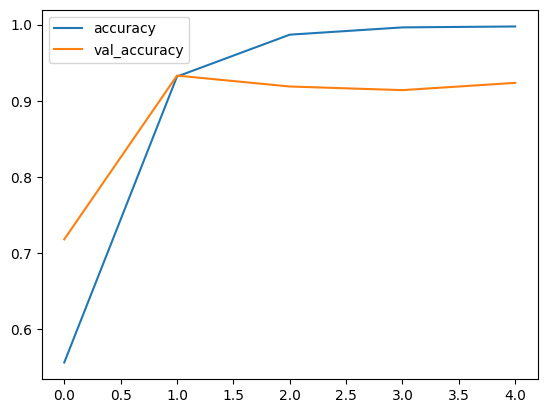

In [57]:
history_model_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

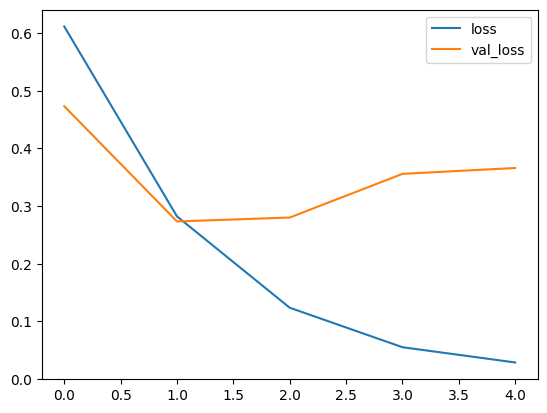

In [58]:
history_model_df[['loss', 'val_loss']].plot()

- Baik hasil loss dan acuraccy mengalami overfitting dan vanishing gradient

In [59]:
y_pred2 = model.predict(X_test)
y_pred2 = np.where(y_pred2 >=0.5, 1, 0)
print(classification_report(y_test, y_pred2))

9/9 [==============================] - 3s 5ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       131
           1       0.96      0.97      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



- Hasil tersebut menunjukkan bahwa model memiliki kinerja yang baik untuk kedua kelas, dengan nilai precision dan recall yang tinggi untuk kedua kelas dan f1-score rata-rata yang cukup tinggi, yaitu 0.97.

Text(95.72222222222221, 0.5, 'True Label')

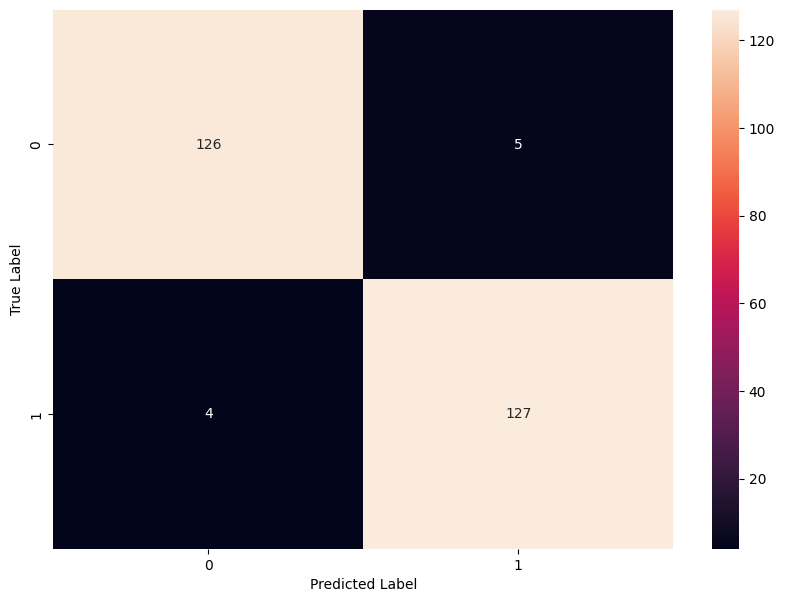

In [60]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred2)
plt.figure(figsize = (10,7))
sns.heatmap(cm2, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

- Dari confusion matrix di atas, dapat dilihat bahwa model mampu memprediksi dengan benar sebanyak 126 data kelas 0 dan 127 data kelas 1. Namun, terdapat 4 data kelas 1 yang salah diprediksi sebagai kelas 0 dan 5 data kelas 0 yang salah diprediksi sebagai kelas 1.

## GRU

In [61]:
history_model2_df = pd.DataFrame(history_gru.history)

<Axes: >

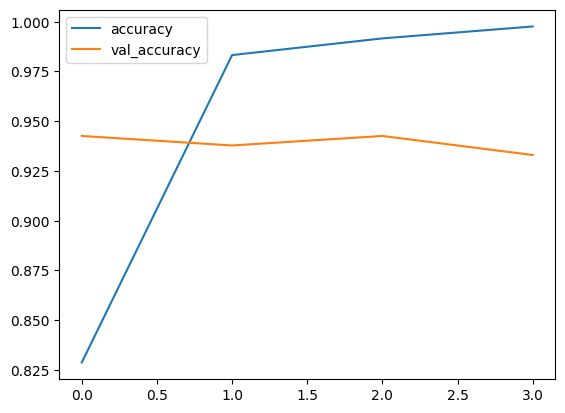

In [62]:
history_model2_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

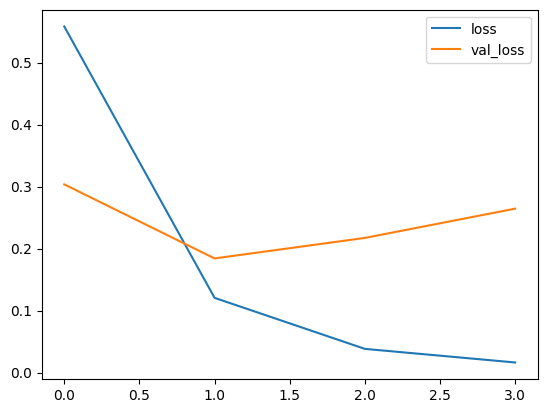

In [63]:
history_model2_df[['loss', 'val_loss']].plot()

- Baik hasil loss dan acuraccy mengalami overfitting dan vanishing gradient

In [64]:
y_pred3 = model_gru.predict(X_test)
y_pred3 = np.where(y_pred3 >=0.5, 1, 0)
print(classification_report(y_test, y_pred3))

9/9 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       131
           1       0.96      0.98      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



- Hasil dari classification_report menunjukkan performa model GRU yang cukup baik dengan akurasi sebesar 0.97. Precision, recall, dan f1-score pada kedua kelas (0 dan 1) juga memiliki nilai yang cukup tinggi, yaitu 97 ke atas.
- Dapat disimpulkan bahwa model GRU dapat melakukan klasifikasi dengan baik pada dataset SMS Spam, sehingga model GRU dipilih sebagai model saving.

Text(95.72222222222221, 0.5, 'True Label')

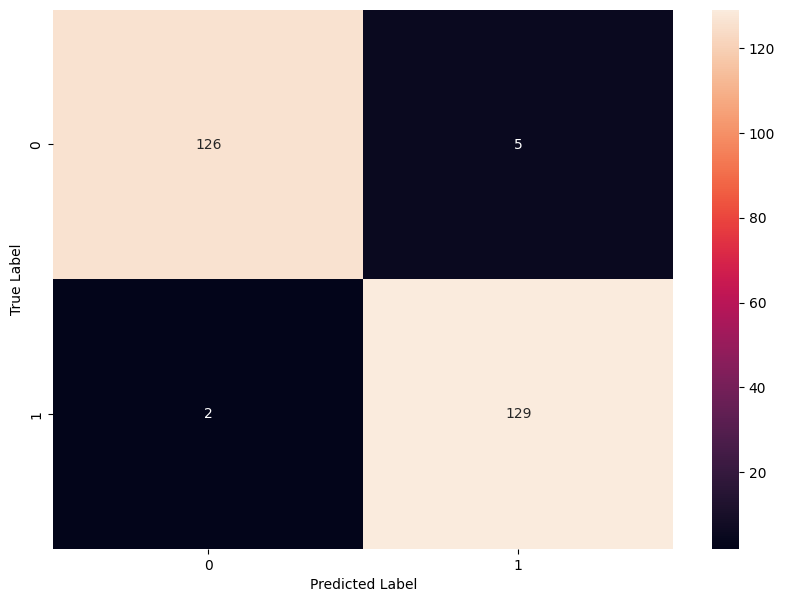

In [65]:
cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred3)
plt.figure(figsize = (10,7))
sns.heatmap(cm3, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

- Pada confusion matrix, kita dapat melihat bahwa model GRU memprediksi 126 data spam dan 5 data ham sebagai spam (false positive) dan 2 data spam dan 129 data ham sebagai ham (false negative). Namun secara keseluruhan, hasil prediksi model GRU memiliki tingkat keakuratan yang cukup tinggi dan dapat diandalkan.

# IX. Model Saving

In [66]:
# Freeze Model
model_gru.trainable = False
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 45)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 45, 128)           321024    
                                                                 
 gru (GRU)                   (None, 45, 32)            15552     
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 342,945
Trainable params: 0
Non-trainable params: 342,945
________________________________________________

In [67]:
# Save Preprocessing
with open('chatwords.pkl', 'wb') as file_1:
  joblib.dump(check_chatwords, file_1)
with open('lowercase.pkl', 'wb') as file_2:
  joblib.dump(lower, file_2)
with open('abbreviation.pkl', 'wb') as file_3:
  joblib.dump(check_abbr, file_3)
with open('punctuation.pkl', 'wb') as file_4:
  joblib.dump(check_punctuation, file_4)
with open('stopwords_lemma.pkl', 'wb') as file_5:
  joblib.dump(token_stopwords_lemma, file_5)

In [68]:
# Save Model
model_gru.save('model_gru')

# X. Kesimpulan

- Dataset SMS Spam adalah dataset yang tidak seimbang (imbalanced), dan pada kasus klasifikasi, penanganan (handling) data yang tidak seimbang ini diperlukan untuk meningkatkan performa model.
- Dataset yang seimbang sangat penting dalam proses klasifikasi karena jika kelompok data dengan label yang dominan terlalu banyak, maka kemungkinan model yang dibuat akan cenderung memprediksi label yang sama dengan label yang dominan tersebut.
- Performa model GRU lebih baik dari LSTM, dilihat dari classification_report menunjukkan performa model GRU yang cukup baik dengan akurasi sebesar 0.97. Precision, recall, dan f1-score pada kedua kelas (0 dan 1) juga memiliki nilai yang cukup tinggi, yaitu 97 ke atas. Sehingga dapat disimpulkan bahwa model GRU dapat melakukan klasifikasi dengan baik pada dataset SMS Spam.
- Dalam bisnis, dapat disimpulkan bahwa model GRU dapat digunakan untuk membantu proses klasifikasi SMS menjadi spam atau tidak spam dengan cukup baik. Hal ini dapat membantu perusahaan dalam mengelola pesan-pesan yang masuk ke dalam sistem mereka, sehingga dapat lebih efektif dan efisien dalam menjawab pesan-pesan yang memang perlu dijawab dan meminimalkan waktu yang terbuang pada pesan-pesan spam yang tidak relevan.
- Namun baik model LSTM dan GRU pada dataset SMS spam mengalami overfitting dan vanishing gradient, maka perlu dilakukan evaluasi dan optimasi lebih lanjut pada arsitektur dan hiperparameter model untuk memperbaiki performa model. Solusi yang dapat dilakukan untuk mengatasi vanishing gradien adalah menggunakan fungsi aktivasi lain seperti Elu, Selu, Leaky dll, dan bisa juga mengganti weight intializer seperti : Glorot, He, Random, Lecun dll, dan juga menggunakan Batch normalization.